# 0.install libraries

In [ ]:
from IPython.display import clear_output 

In [ ]:
#!pip install pycaret==2.3.10
!pip install pycaret
clear_output()

In [ ]:
# install shap
!pip install shap
clear_output()

In [ ]:
# from pycaret.utils import enable_colab
# enable_colab()
# !pip install markupsafe==2.0.1
# !pip uninstall NumPy --yes
# !pip install NumPy==1.20

# 1.import libraries

In [ ]:
# Restart runtime before ruuning this line of code
from pycaret.regression import *

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [ ]:
from numpy.core.fromnumeric import shape
import shap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import time

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# for "3.Anomaly detection"
from pycaret.anomaly import *

In [ ]:
# for "4.Hyperparameter tuning"
# calculating different regression metrics
from sklearn.model_selection import GridSearchCV
import numpy as np

# 2.import data

In [ ]:
# read data and drop the first column
raw_test_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1jrv549VVFST4VcX1kFkXR8AdrT7MEOTI', 
                  sep=",", engine = "python").iloc[:, 1:]
raw_train_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1gU6xMwaSiF2h28kHrmtHUXgeK3zbonYW',  
                  sep=",", engine = "python").iloc[:, 1:]

In [ ]:
# concatnate data
raw_dataset = pd.concat([raw_train_data,raw_test_data], ignore_index=True) 
from scipy import stats
raw_dataset=raw_dataset.dropna()[(np.abs(stats.zscore(raw_dataset.dropna())) < 5).all(axis=1)]
print("Final data:", raw_dataset.shape)
print("Final raw data:", raw_dataset.shape)

Final data: (2076, 11)
Final raw data: (2076, 11)


In [ ]:
import seaborn as sns

<Axes: xlabel='y'>

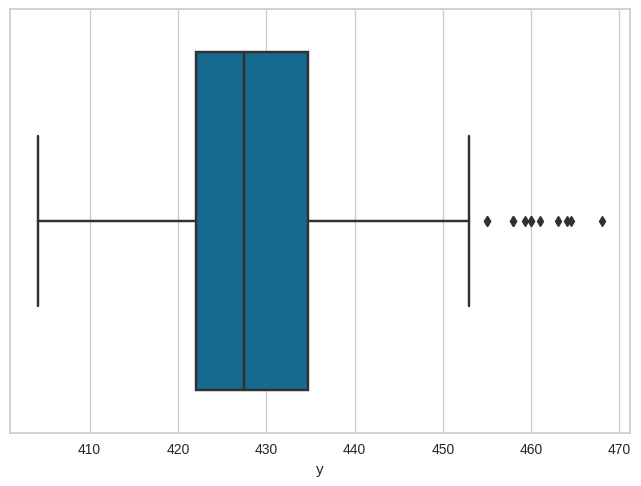

In [ ]:
# Check data spread
sns.boxplot(x=raw_dataset['y'])

# 3.Anomaly detection

In [ ]:
data = raw_dataset.copy()

In [ ]:
s = setup(data)

,Description,Value
0,Session id,448
1,Original data shape,"(2076, 11)"
2,Transformed data shape,"(2076, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# create model 
iforest = create_model('iforest')
print(iforest)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=448, verbose=0)


In [ ]:
# analyze model
#plot_model(iforest, plot = 'tsne')
#fig.saveiforest('plot.png')
# Import the required libraries
from pycaret.anomaly import create_model, plot_model

# Create the Isolation Forest model
iforest = create_model('iforest')

# Print the model details
print(iforest)



# Save the plot as a PNG file in the current directory
# plot_tsne.savefig('plot.png')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=448, verbose=0)


In [ ]:
# Plot the model using t-SNE algorithm
plot_tsne = plot_model(iforest, plot='tsne')

In [ ]:
# !pip install umap-learn

In [ ]:
# plot_model(iforest, plot = 'umap')

In [ ]:
# assign model
# assigns anomaly labels to the dataset for a given model. (1 = outlier, 0 = inlier).
result = assign_model(iforest)

In [ ]:
result['Anomaly'].value_counts()

0    1972
1     104
Name: Anomaly, dtype: int64

In [ ]:
data_without_outliers = result[result["Anomaly"] == 0]
data_without_outliers.shape

(1972, 13)

In [ ]:
Final_data = data_without_outliers.drop(["Anomaly", "Anomaly_Score"], axis = 1)
Final_data.shape

(1972, 11)

<Axes: xlabel='y'>

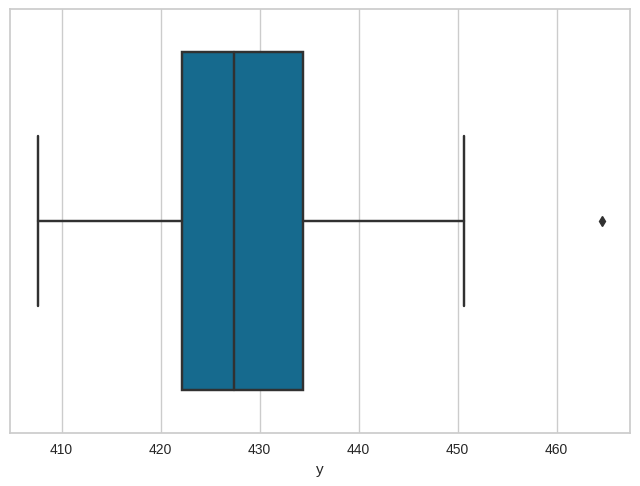

In [ ]:
# Check data spread for outliers again
sns.boxplot(x=Final_data['y'])

In [ ]:
raw_dataset.columns=['y','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10']
Final_data =raw_dataset
x = Final_data.iloc[:, Final_data.columns != 'y']
y = Final_data['y']

In [ ]:
from sklearn.utils import shuffle
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    Final_data.iloc[:, 1:],
    Final_data.iloc[:, 0:1],
    test_size=0.3,
    random_state=17)

# 4.Hyperparameter tuning

> Find best hyperparameter for ET

In [ ]:
etr = ExtraTreesRegressor()

In [ ]:
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [ ]:
# check avaiable parameters
etr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
parameters = {
    'bootstrap': [True], # [True, False]
    'criterion': ["mse"],
    'max_depth': [None], # [None, 1, 3, 5, 7, 9, 11] 
    'min_samples_split': [0.1], 
    'n_estimators': [200, 300, 350, 400, 500], #[7, 9, 11, 13, 17, 100, 200]
    'min_samples_split': [2], # [2,0.3,2086//3, 2086//5]
    'min_samples_leaf': [1], # [1,0.5, 2086//3, 2086//5]
}

In [ ]:
tuning_model=GridSearchCV(etr,param_grid=parameters,scoring='r2',cv=3,verbose=3)

In [ ]:
from datetime import datetime

In [ ]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [ ]:
X=Final_data.iloc[:, 1:]

In [ ]:
y=Final_data.iloc[:, 0:1]

In [ ]:
# %%capture

# start_time=timer(None)

# tuning_model.fit(X_train,y_train)

# timer(start_time)

In [ ]:
# best model score
# tuning_model.best_score_

# 5.Set up extra-trees regression model

In [ ]:
et_2 = ExtraTreesRegressor(bootstrap= False, criterion= 'squared_error', 
                           max_depth= None, min_samples_leaf= 1, 
                           min_samples_split= 2, n_estimators= 200)

In [ ]:
np.random.seed(17)
et_2.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=200)

In [ ]:
et_2.score(X_train,y_train)

0.9999999980961827

In [ ]:
et_2.score(X_test,y_test)

0.8222033038233096

In [ ]:
predictions =et_2.predict(X_test)

# 6.Explain the result of ET by Shap

In [ ]:
x = Final_data.iloc[:, Final_data.columns != 'y']
y = Final_data['y']

In [ ]:
et_2.fit(x, y)

ExtraTreesRegressor(n_estimators=200)

In [ ]:
explainer = shap.Explainer(et_2)

In [ ]:
shap_values = explainer.shap_values(x)

In [ ]:
print("Our model's average prediction for our data set: ", explainer.expected_value)

Our model's average prediction for our data set:  [428.67302655]


In [ ]:
Final_data.iloc[1000,:]

y              432.500000
Feature 1      392.340000
Feature 2       19.759801
Feature 3       10.103653
Feature 4      113.802285
Feature 5        3.425575
Feature 6       79.493843
Feature 7      385.721182
Feature 8      304.359786
Feature 9     7262.723790
Feature 10    1305.904738
Name: 1006, dtype: float64

In [ ]:
Final_data.iloc[2000,:]

y              430.406250
Feature 1      401.375000
Feature 2       21.387695
Feature 3        9.947075
Feature 4      127.944291
Feature 5        7.382690
Feature 6      110.732422
Feature 7      390.359375
Feature 8      395.622954
Feature 9     6502.627594
Feature 10    1810.500000
Name: 2010, dtype: float64

## 1.Explain a single prediction

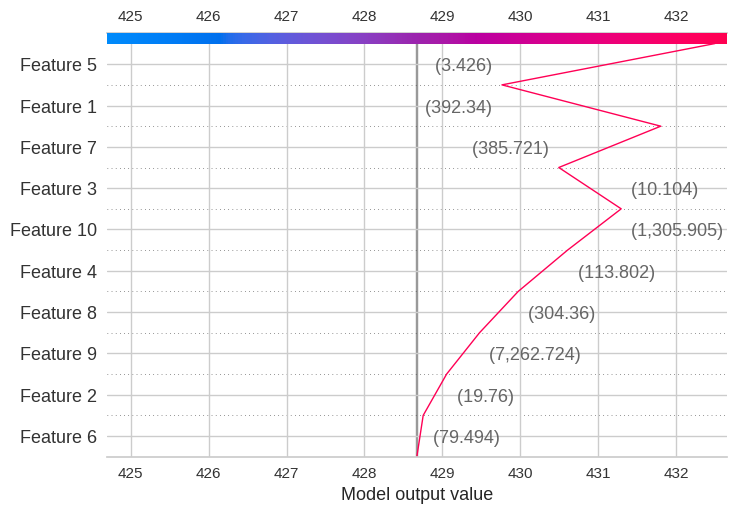

In [ ]:
# visualization of how a single observation deviates from the average prediction

# randomly choose an observation
row = 1000

# plot
shap.decision_plot(explainer.expected_value, shap_values[row, :], x.iloc[row, :])

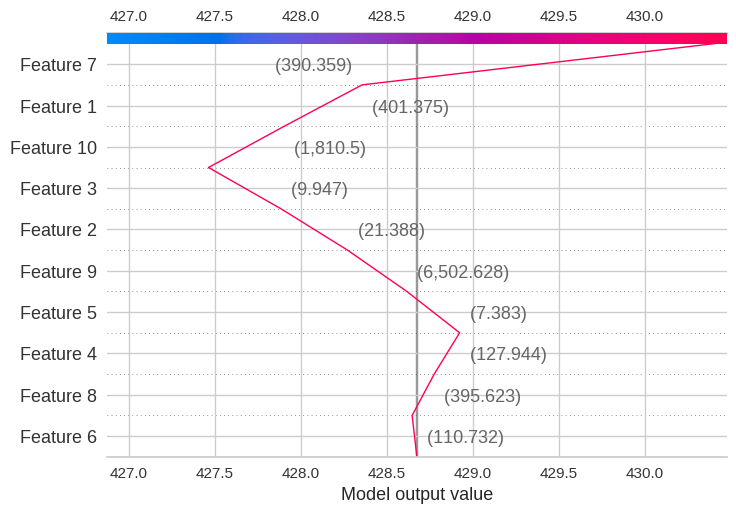

In [ ]:
# visualization of how a single observation deviates from the average prediction

# randomly choose an observation
row = 2000

# plot
shap.decision_plot(explainer.expected_value, shap_values[row, :], x.iloc[row, :])

## 2.Explain the entire dataset

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# plot
shap.plots.force(explainer.expected_value, shap_values)

## 3.Heatmap

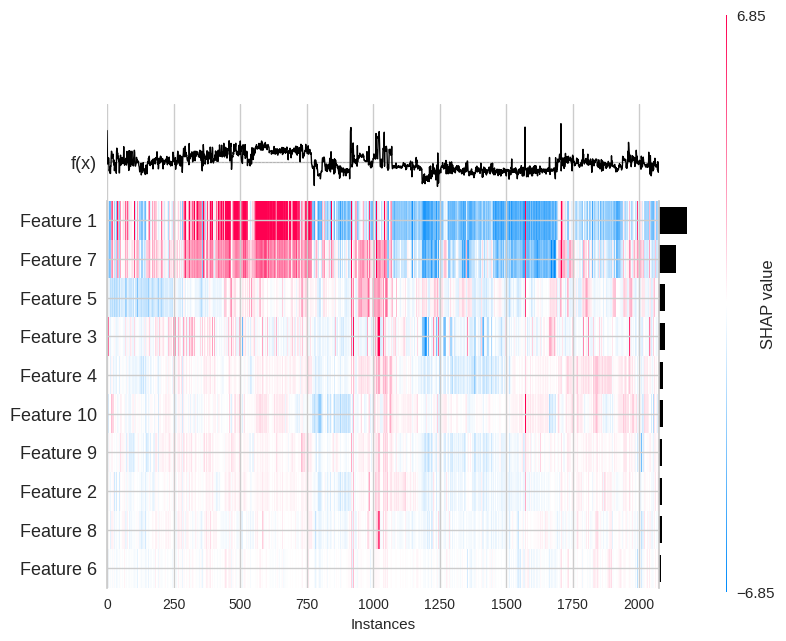

In [ ]:
shap_values_explaination = shap.Explanation(shap_values, feature_names=x.columns.tolist()) 
shap.plots.heatmap(shap_values_explaination, instance_order=np.arange(len(Final_data)))

## 4.Feature importance summary

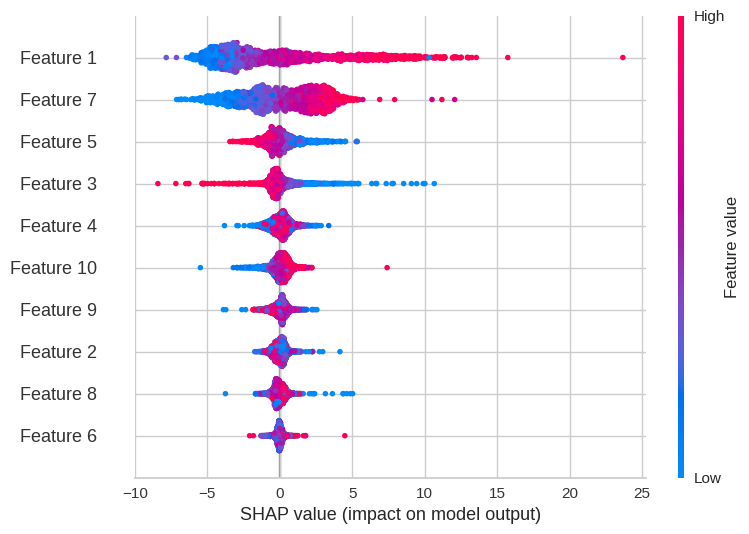

In [ ]:
# a granular look at feature importances for the entire data set.
shap.summary_plot(shap_values, x)

In [ ]:
# shap.plots.waterfall(shap_values[0])

## 5.Feature Interactions

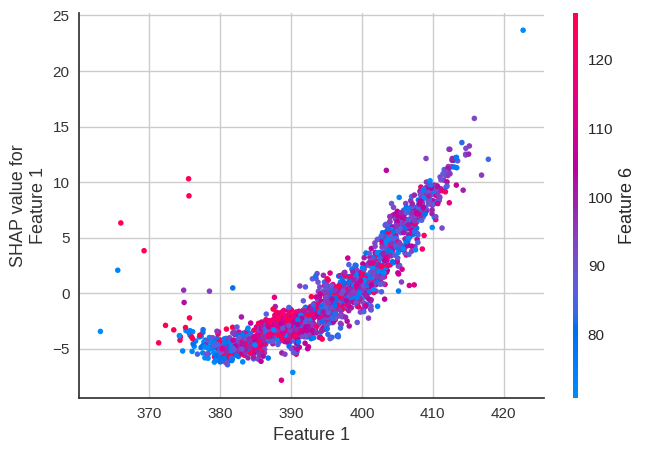

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# plot an example for "___" and "___"
shap.dependence_plot(0, shap_values, features=x, 
    interaction_index=5)

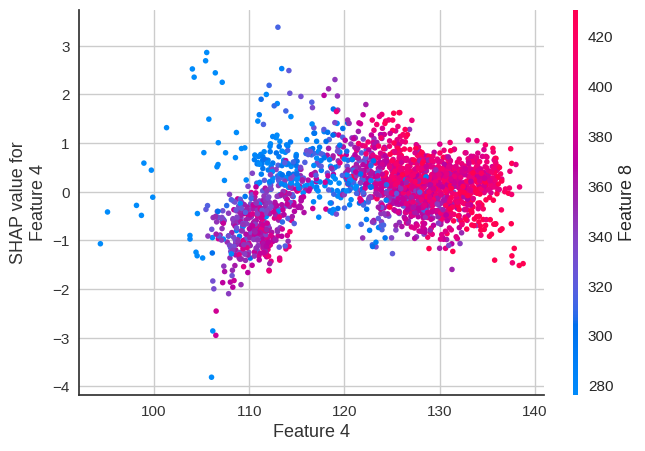

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# plot an example for "___" and "___"
shap.dependence_plot(3, shap_values, features=x, 
    interaction_index=7)

# 7.xiexie dage

本project在大哥的悉心指导下完成的。大哥渊博的专业知识、严谨的治学态度，精益求精的工作作风，诲人不倦的高尚师德，严于律己、宽以待人的崇高风范，平易近人的人格魅力对本人影响深远。不仅仅使本人树立了远大的学习目标、掌握了基本的研究方法，还使本人明白了许多为人处事的道理。本次project从选题到完成，每一步都是在大哥的悉心指导下完成的，倾注了大哥超多的心血。在此，谨向大哥表示崇高的敬意和衷心的感谢！

时光匆匆如流水，转眼便是project收尾时节，春梦秋云。离poster日期已日趋渐近，收尾的完成也随之进入了尾声。从开始进入课题到收尾的顺利进展，一向都离不开大哥给我热情的帮忙，在那里请理解我诚挚的谢意！在此我向大哥表示衷心的感谢，谢谢你的辛勤栽培，谢谢你在教学的同时更多的是传授我做人的道理，谢谢你孜孜不倦的教诲！

两个多月的寒窗，所收获的不仅仅仅是愈加丰厚的知识，更重要的是在阅读、实践中所培养的思维方式、表达潜力和广阔视野。很庆幸这进展个多月来我学到了如此多的知识，无论在学习上、生活上，还是工作上，都给予了我无私的帮忙和热心的照顾，让我在一个充满温馨的环境中度过知识的学习生活。感恩之情难以用言语量度，谨以最朴实的话语致以最崇高的敬意。

最后要感谢的是我的父母，他们不仅仅培养了我对中国传统文化的浓厚的兴趣，让我在漫长的人生旅途中使心灵有了虔敬的归依，在未来的日子里，我会更加努力的学习和工作，不辜负父母对我的殷殷期望！

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRrP_Skql-MwLrhZOcbXHFIyb8mevycUkQsw&usqp=CAU)
![](http://5b0988e595225.cdn.sohucs.com/images/20190115/609d75d5c9324429874e2c3f53dc1299.jpeg)
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbyfmFBDU1TzR1qvmZ7szJuFSQ2mJ5XqX8zku_raIGWNjcabg9hn37M92vSNBZrU7-OZ0&usqp=CAU)